In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
upload=files.upload()

Saving Deni_Avdija_2425.xlsx to Deni_Avdija_2425 (2).xlsx


In [ ]:
dataframe=pd.read_excel("Deni_Avdija_2425.xlsx")
dataframe.head()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Gtm             72 non-null     int64         
 1   Date            72 non-null     datetime64[ns]
 2   Team            72 non-null     object        
 3   Home            72 non-null     int64         
 4   Opp             72 non-null     object        
 5   Win             72 non-null     int64         
 6   Portland_Score  72 non-null     int64         
 7   Others_Score    72 non-null     int64         
 8   GS              72 non-null     int64         
 9   MP              72 non-null     float64       
 10  FG              72 non-null     int64         
 11  FGA             72 non-null     int64         
 12  FG%             72 non-null     float64       
 13  3P              72 non-null     int64         
 14  3PA             72 non-null     int64         
 15  3P%     

In [ ]:
dataframe["MP"].head()
dataframe["MP"].dtype
dataframe.describe()["MP"]

,MP
count,72.000000
mean,30.021528
min,5.700000
25%,23.650000
50%,30.416667
75%,35.683333
max,43.500000
std,7.497082


In [ ]:
dataframe.describe()[["PTS","AST","TRB","GmSc","MP"]]



,PTS,AST,TRB,GmSc,MP
count,72.000000,72.000000,72.000000,72.000000,72.000000
mean,16.930556,3.902778,7.250000,13.675000,30.021528
min,0.000000,0.000000,2.000000,-2.600000,5.700000
25%,11.000000,2.000000,5.000000,8.250000,23.650000
50%,16.000000,4.000000,6.000000,13.250000,30.416667
75%,20.250000,5.000000,9.000000,18.300000,35.683333
max,37.000000,10.000000,16.000000,35.200000,43.500000
std,8.274050,2.163459,3.515559,8.261599,7.497082


In [ ]:
dataframe[["MP",'PTS',"AST",'TRB','GmSc']].corr()



,MP,PTS,AST,TRB,GmSc
MP,1.000000,0.681527,0.609489,0.714810,0.663685
PTS,0.681527,1.000000,0.502395,0.572935,0.946766
AST,0.609489,0.502395,1.000000,0.490269,0.601189
TRB,0.714810,0.572935,0.490269,1.000000,0.593681
GmSc,0.663685,0.946766,0.601189,0.593681,1.000000


In [ ]:

dataframe.groupby("Win")[["PTS","MP","GmSc"]].mean()


,PTS,MP,GmSc
Win,,,
0,16.487179,30.261111,12.833333
1,17.454545,29.738384,14.669697


In [ ]:

dataframe.groupby("Opp")[["PTS","MP"]].mean().sort_values("PTS",ascending=False)


,PTS,MP
Opp,,
NYK,30.000000,40.700000
CHI,28.500000,35.341667
MIL,24.500000,40.250000
GSW,24.500000,34.041667
CLE,23.500000,39.916667
TOR,22.500000,33.575000
ATL,22.000000,31.666667
DEN,21.250000,30.287500
LAL,20.000000,31.016667


Text(0.5, 1.0, 'Points vs Minutes')

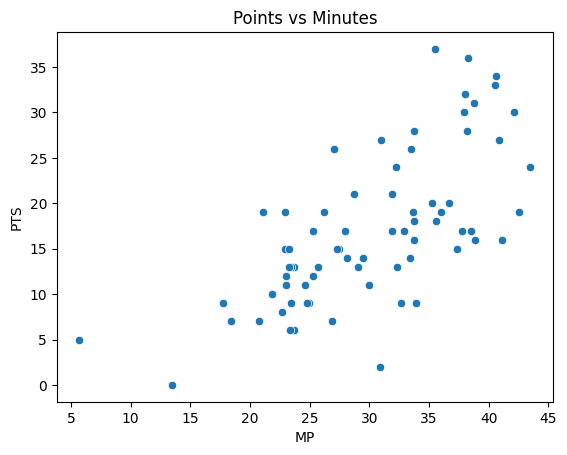

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=dataframe,x="MP",y="PTS")
plt.title("Points vs Minutes")

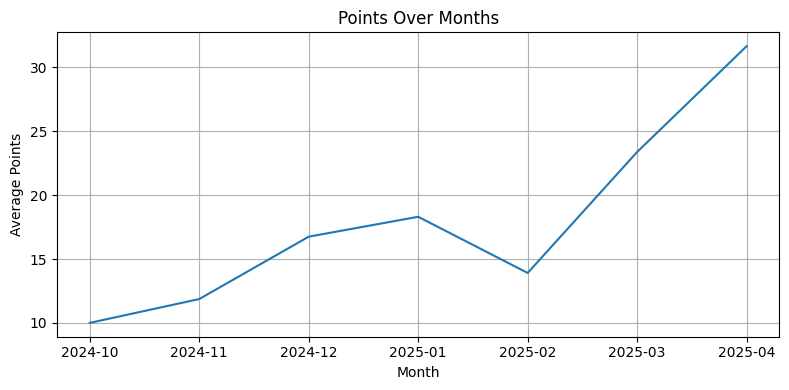

In [ ]:
dataframe["Month"]=pd.to_datetime(dataframe["Date"]).dt.to_period("M")

pts_avg_month=dataframe.groupby("Month")["PTS"].mean().reset_index()
pts_avg_month["month"]=pts_avg_month["Month"].astype(str)
pts_avg_month

plt.figure(figsize=(8,4))
sns.lineplot(data=pts_avg_month,x="month",y="PTS")
plt.title("Points Over Months")
plt.xlabel("Month")
plt.ylabel("Average Points")
plt.grid(True)
plt.tight_layout()
plt.show()



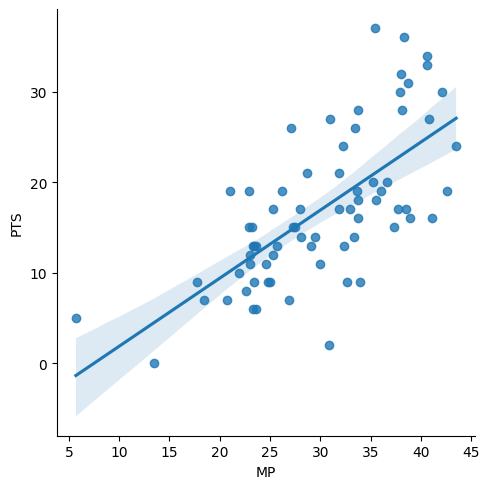

In [ ]:
import seaborn as sns
sns.lmplot(data=dataframe,x="MP",y="PTS")


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(dataframe[["MP","FGA","3PA","FTA"]],dataframe["PTS"])
model.coef_,model.intercept_,model.score(dataframe[["MP","FGA","3PA","FTA"]],dataframe["PTS"])
print("Coefficents:", model.coef_)
print("Intercept:", model.intercept_)
print("R2 Score:", model.score(dataframe[["MP","FGA","3PA","FTA"]],dataframe["PTS"]))

Coefficents: [0.11358877 0.98928736 0.3988652  0.93884174]
Intercept: -4.821491116742475
R2 Score: 0.7474470776406331


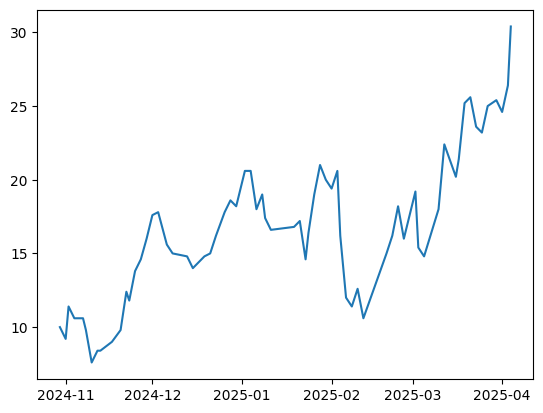

In [ ]:
dataframe["PTS_MAS"]=dataframe["PTS"].rolling(5).mean()
plt.plot(dataframe["Date"],dataframe["PTS_MAS"])


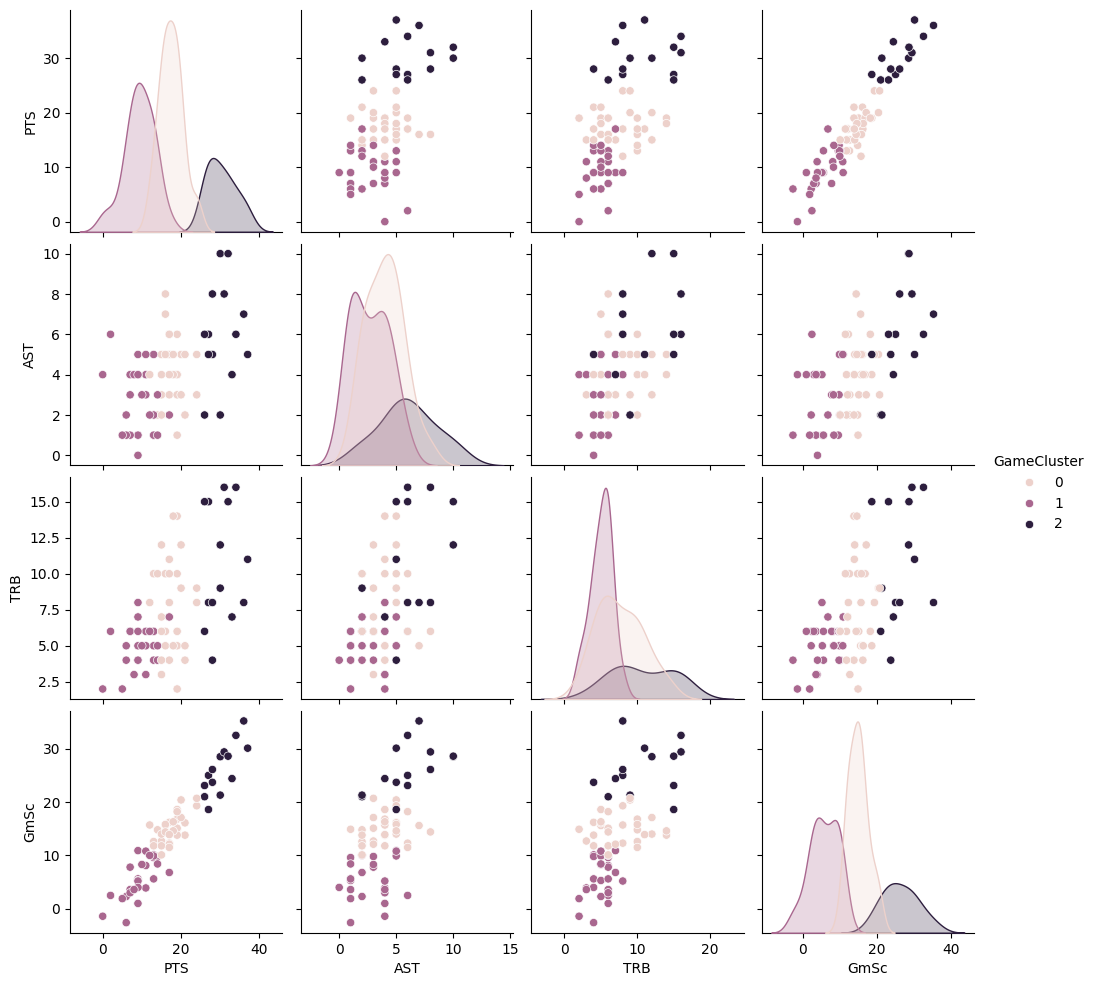

In [ ]:
from sklearn.cluster import KMeans
feats=dataframe[["PTS","AST","TRB","GmSc"]]
kmean=KMeans(n_clusters=3,random_state=0).fit(feats)
dataframe["GameCluster"]=kmean.labels_

sns.pairplot(dataframe,hue="GameCluster",vars=["PTS","AST","TRB","GmSc"])

In [ ]:
H_A_comp=(
    dataframe.groupby("Home")[["PTS","AST","TRB","GmSc"]]
    .mean()
    .round(2)
    .rename(index={1:"Home",0:"Away"})
)
print(H_A_comp)

        PTS   AST   TRB   GmSc
Home                          
Away  16.69  3.79  7.54  13.47
Home  17.21  4.03  6.91  13.92


In [ ]:
W_L_comp=(
    dataframe.groupby("Win")[["PTS","AST","TRB","GmSc"]]
    .mean()
    .round(2)
    .rename(index={1:"Win",0:"Lose"})
)
print(W_L_comp)


        PTS   AST   TRB   GmSc
Win                           
Lose  16.49  3.90  6.90  12.83
Win   17.45  3.91  7.67  14.67


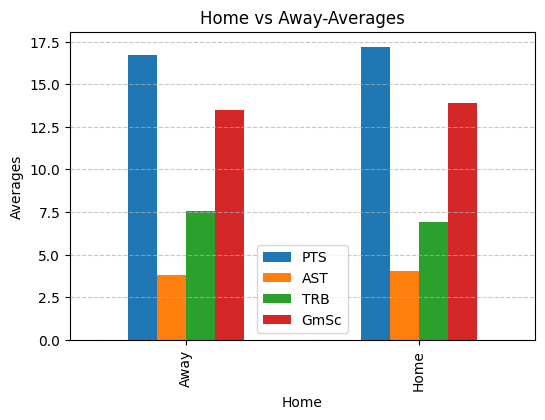

In [ ]:
H_A_comp.plot(kind="bar",figsize=(6,4))
plt.title("Home vs Away-Averages")
plt.ylabel("Averages")
plt.grid(True,axis="y",linestyle="--",alpha=0.7)
plt.show()

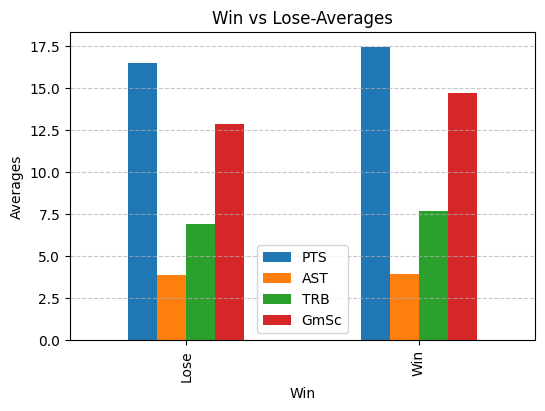

In [ ]:
W_L_comp.plot(kind="bar",figsize=(6,4))
plt.title("Win vs Lose-Averages")
plt.ylabel("Averages")
plt.grid(True,axis="y",linestyle="--",alpha=0.7)
plt.show()

In [ ]:
import scipy.stats as stats

GS_win=dataframe[dataframe["Win"]==1]["GmSc"]
GS_lose=dataframe[dataframe["Win"]==0]["GmSc"]

t_stat,p_val=stats.ttest_ind(GS_win,GS_lose,equal_var=False)
print("t-statistic:",t_stat)
print("p-value:",p_val)

t-statistic: 0.9364477324761671
p-value: 0.35239245927083285


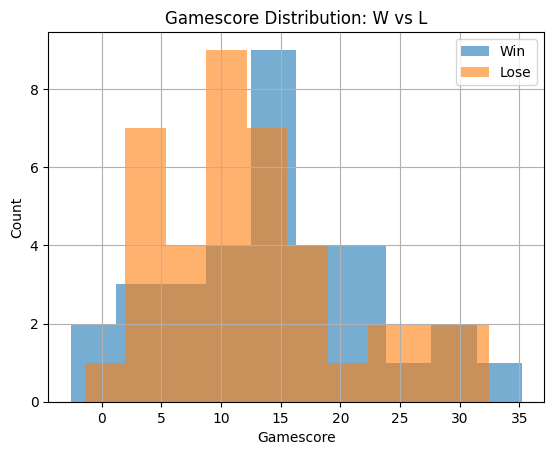

In [ ]:
GS_win.hist(alpha=0.6,label="Win")
GS_lose.hist(alpha=0.6,label="Lose")
plt.legend()
plt.title("Gamescore Distribution: W vs L")
plt.xlabel("Gamescore")
plt.ylabel("Count")
plt.show()

In [ ]:
stat,p_val=stats.mannwhitneyu(GS_win,GS_lose,alternative="two-sided")
print("statistic:",stat)
print("MW P-Value:",p_val)

statistic: 752.0
MW P-Value: 0.22222180268102498


In [ ]:
pts_GS=dataframe.loc[dataframe["GS"]==1,"PTS"]
pts_GB=dataframe.loc[dataframe["GS"]==0,"PTS"]

t_stat,p_val=stats.ttest_ind(pts_GS,pts_GB,equal_var=False)
print("t-statistic:",t_stat)
print("p-value:",p_val)

t-statistic: 1.8936798045158008
p-value: 0.0655411190892098


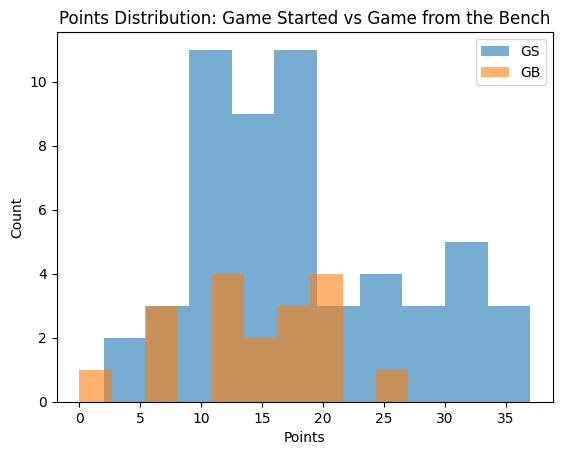

In [ ]:
plt.hist(pts_GS,alpha=0.6,label="GS")
plt.hist(pts_GB,alpha=0.6,label="GB")
plt.legend()
plt.title("Points Distribution: Game Started vs Game from the Bench")
plt.xlabel("Points")
plt.ylabel("Count")
plt.show()

In [ ]:
stat,p_val=stats.mannwhitneyu(pts_GS,pts_GB,alternative="two-sided")
print("statistic:",stat)
print("MW P-Value:",p_val)

statistic: 577.5
MW P-Value: 0.23594250965013575


In [ ]:
dataframe["HighPTS"]=(dataframe["PTS"]>=20).astype(int)
dataframe[["PTS","HighPTS","Win"]].head()

,PTS,HighPTS,Win
0,15,0,0
1,2,0,0
2,11,0,1
3,9,0,0
4,13,0,1


In [ ]:
cntgry=pd.crosstab(dataframe["HighPTS"],dataframe["Win"])
print(cntgry)

Win       0   1
HighPTS        
0        30  22
1         9  11


In [ ]:
chi2,p,dof,expctd=stats.chi2_contingency(cntgry)
print("Chi-Square Statistic:",chi2)
print("P-Value:",p)
print("Degrees of Freedom:",dof)
print("Expected Frequencies:\n",expctd)

Chi-Square Statistic: 0.4957504034427112
P-Value: 0.481373333154569
Degrees of Freedom: 1
Expected Frequencies:
 [[28.16666667 23.83333333]
 [10.83333333  9.16666667]]


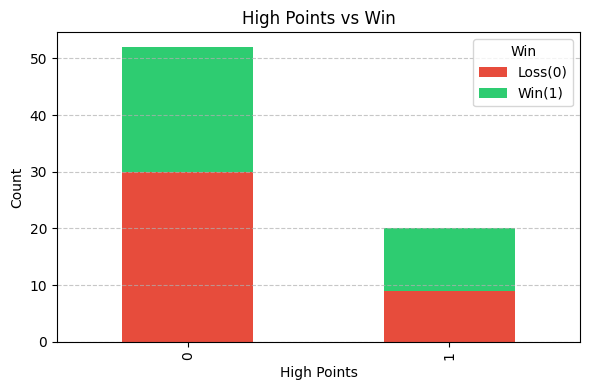

In [ ]:
cntgry.plot(kind="bar",stacked=True,color=["#e74c3c","#2ecc71"],figsize=(6,4))
plt.title("High Points vs Win")
plt.xlabel("High Points")
plt.ylabel("Count")
plt.legend(title="Win",labels=["Loss(0)","Win(1)"])
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.tight_layout()
plt.show()

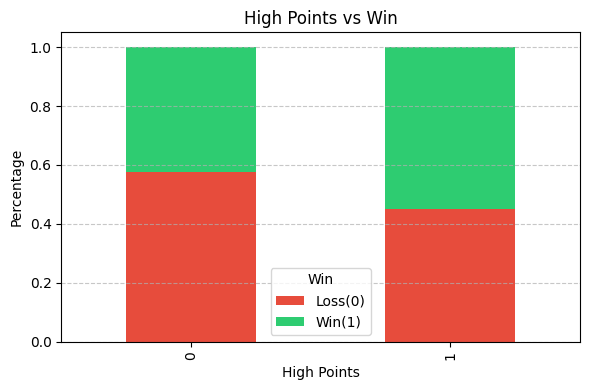

In [ ]:
perc=cntgry.div(cntgry.sum(axis=1),axis=0)
perc.plot(kind="bar",stacked=True,color=["#e74c3c","#2ecc71"],figsize=(6,4))
plt.title("High Points vs Win")
plt.xlabel("High Points")
plt.ylabel("Percentage")
plt.legend(title="Win",labels=["Loss(0)","Win(1)"])
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

dataframe.head()

,Gtm,Date,Team,Home,Opp,Win,Portland_Score,Others_Score,GS,MP,...,BLK,TOV,PF,PTS,GmSc,+/-,Month,PTS_MAS,GameCluster,HighPTS
0,1,2024-10-23,POR,1,GSW,0,104,140,1,27.483333,...,2,4,2,15,12.1,-13,2024-10,NaN,0,0
1,2,2024-10-25,POR,1,NOP,0,103,105,1,30.900000,...,2,2,1,2,2.5,2,2024-10,NaN,1,0
2,3,2024-10-27,POR,1,NOP,1,125,103,1,29.933333,...,0,1,3,11,8.1,21,2024-10,NaN,1,0
3,4,2024-10-28,POR,0,SAC,0,98,111,1,24.983333,...,0,2,2,9,5.6,-21,2024-10,NaN,1,0
4,5,2024-10-30,POR,0,LAC,1,106,105,1,29.033333,...,2,2,2,13,12.6,-4,2024-10,10.0,0,0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Gtm'].plot(kind='hist', bins=20, title='Gtm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Home'].plot(kind='hist', bins=20, title='Home')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Win'].plot(kind='hist', bins=20, title='Win')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Opp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Gtm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Gtm', y='Home', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Home', y='Win', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Win', y='Portland_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Home']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Opp')):
  _plot_series(series, series_name, i)
  fig.legend(title='Opp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Home')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Win']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Opp')):
  _plot_series(series, series_name, i)
  fig.legend(title='Opp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Win')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Portland_Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Opp')):
  _plot_series(series, series_name, i)
  fig.legend(title='Opp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Portland_Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Others_Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Opp')):
  _plot_series(series, series_name, i)
  fig.legend(title='Opp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Others_Score')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Gtm'].plot(kind='line', figsize=(8, 4), title='Gtm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Home'].plot(kind='line', figsize=(8, 4), title='Home')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Win'].plot(kind='line', figsize=(8, 4), title='Win')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Opp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Opp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Opp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Gtm', y='Opp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Opp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Home', y='Opp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Opp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Win', y='Opp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
opp_stats=(
    dataframe.groupby("Opp")
    .agg(
        AvgMin=("MP","mean"),
        AvgPTS=("PTS","mean"),
        AvgAST=("AST","mean"),
        AvgTRB=("TRB","mean")
    )
    .reset_index()
    .round(2)
)
opp_stats

,Opp,AvgMin,AvgPTS,AvgAST,AvgTRB
0,ATL,31.67,22.00,7.00,11.50
1,BOS,30.78,14.50,3.00,8.50
2,CHI,35.34,28.50,4.00,11.50
3,CHO,28.48,16.50,4.00,4.50
4,CLE,39.92,23.50,8.00,11.00
5,DAL,29.36,17.50,3.50,5.75
6,DEN,30.29,21.25,4.25,5.25
7,DET,29.45,14.00,3.00,4.00
8,GSW,34.04,24.50,4.00,11.50
9,HOU,28.41,13.50,1.50,8.00


In [ ]:
dataframe["Opp"].unique()

array(['GSW', 'NOP', 'SAC', 'LAC', 'OKC', 'PHO', 'SAS', 'MIN', 'MEM',
       'ATL', 'HOU', 'IND', 'DAL', 'UTA', 'LAL', 'DEN', 'PHI', 'MIL',
       'DET', 'MIA', 'CHI', 'ORL', 'CHO', 'WAS', 'CLE', 'BOS', 'NYK',
       'TOR'], dtype=object)

In [ ]:
team_coords = pd.DataFrame([
    ("POR", 45.5316,  -122.6668),
    ("LAL", 34.0430,  -118.2673),
    ("LAC", 33.9533,  -118.3387),
    ("GSW", 37.7680,  -122.3877),
    ("SAC", 38.5802,  -121.4997),
    ("PHO", 33.4457,  -112.0712),
    ("DEN", 39.7487,  -104.9959),
    ("UTA", 40.7683,  -111.9011),
    ("DAL", 32.7905,  -96.8104),
    ("SAS", 29.4270,  -98.4375),
    ("HOU", 29.7508,  -95.3621),
    ("NOP", 29.9489,  -90.0821),
    ("MEM", 35.1382,  -90.0506),
    ("OKC", 35.4634,  -97.5151),
    ("MIN", 44.9795,  -93.2760),
    ("CHI", 41.8807,  -87.6742),
    ("MIL", 43.0451,  -87.9170),
    ("IND", 39.7640,  -86.1555),
    ("CLE", 41.4966,  -81.6880),
    ("DET", 42.3410,  -83.0551),
    ("ATL", 33.7573,  -84.3963),
    ("MIA", 25.7814,  -80.1870),
    ("ORL", 28.5392,  -81.3839),
    ("CHO", 35.2251,  -80.8392),
    ("WAS", 38.8981,  -77.0209),
    ("NYK", 40.7505,  -73.9934),
    ("BKN", 40.6826,  -73.9754),
    ("PHI", 39.9012,  -75.1719),
    ("BOS", 42.3662,  -71.0621),
    ("TOR", 43.6435,  -79.3791),
], columns=["Opp", "Lat", "Lon"])


In [ ]:
map_df=opp_stats.merge(team_coords,on="Opp",how="inner")
map_df.head()

,Opp,AvgMin,AvgPTS,AvgAST,AvgTRB,Lat,Lon
0,ATL,31.67,22.0,7.0,11.5,33.7573,-84.3963
1,BOS,30.78,14.5,3.0,8.5,42.3662,-71.0621
2,CHI,35.34,28.5,4.0,11.5,41.8807,-87.6742
3,CHO,28.48,16.5,4.0,4.5,35.2251,-80.8392
4,CLE,39.92,23.5,8.0,11.0,41.4966,-81.6880


In [ ]:
fig = px.scatter_mapbox(
    map_df,
    lat="Lat",
    lon="Lon",
    hover_name="Opp",
    hover_data={
        "AvgMin": True,
        "AvgPTS": True,
        "AvgTRB": True,
        "AvgAST": True,
        "Lat": False,
        "Lon": False,
    },
    zoom=3,
    height=600
)

fig.update_layout(
    mapbox_style="open-street-map",  # no API key needed
    title="Deni Avdija – Average Stats vs Each Opponent"
)

fig.show()


In [ ]:
!mv NBA_logos/NBA_logos/* NBA_logos/
!rm -r NBA_logos/NBA_logos

In [ ]:
import os
LOGO_DIR="NBA_logos"
print(os.listdir(LOGO_DIR))

['NYK.png', 'GSW.png', 'MIN.png', 'NOP.png', 'DET.png', 'DAL.png', 'MIA.png', 'MEM.png', 'POR.png', 'WAS.png', 'PHI.png', 'ATL.png', 'BOS.png', 'CLE.png', 'BRK.png', 'PHO.png', 'OKC.png', 'CHI.png', 'SAC.png', 'SAS.png', 'ORL.png', 'LAL.png', 'CHO.png', 'IND.png', 'LAC.png', 'HOU.png', 'UTH.png', 'DEN.png', 'TOR.png', 'MIL.png']


In [ ]:
logo_path=f"{LOGO_DIR}/{row['Opp']}.png"

In [ ]:
import os

old = "NBA_logos/PHX.png"
new = "NBA_logos/PHO.png"

if os.path.exists(old):
    os.rename(old, new)
    print("Renamed phx → pho successfully!")
else:
    print("File not found:", old)


File not found: NBA_logos/PHX.png


In [ ]:
import os

old = "NBA_logos/UTH.png"
new = "NBA_logos/UTA.png"

if os.path.exists(old):
    os.rename(old, new)
    print("Renamed uth → uta successfully!")
else:
    print("File not found:", old)


File not found: NBA_logos/UTH.png



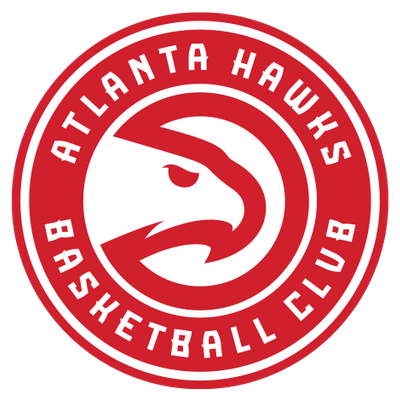
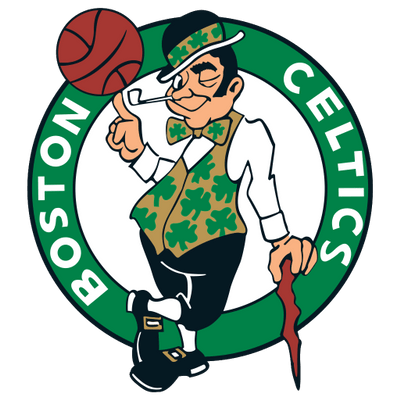
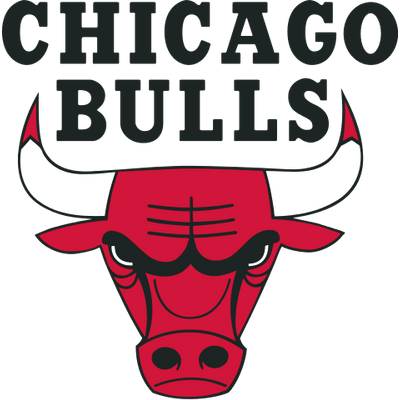
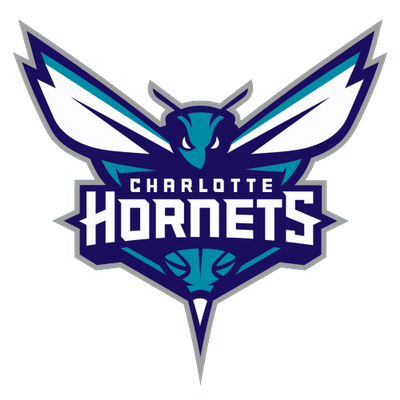
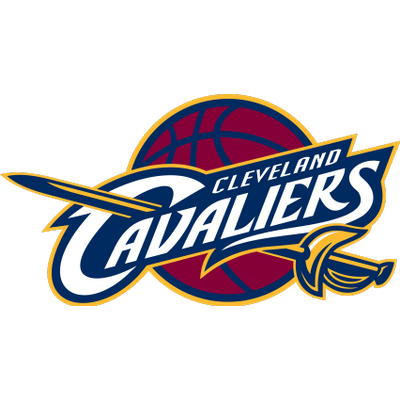
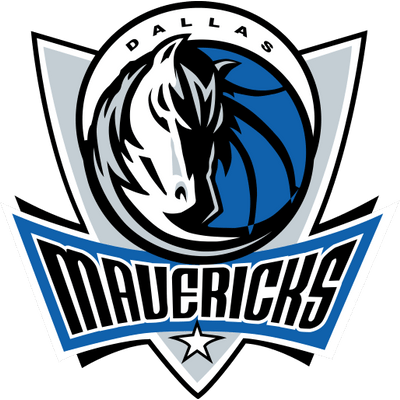
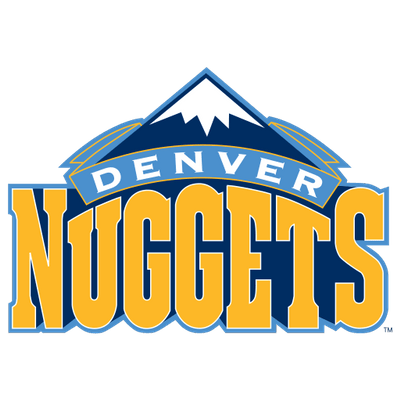
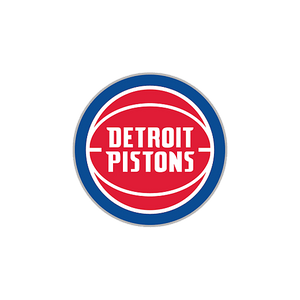
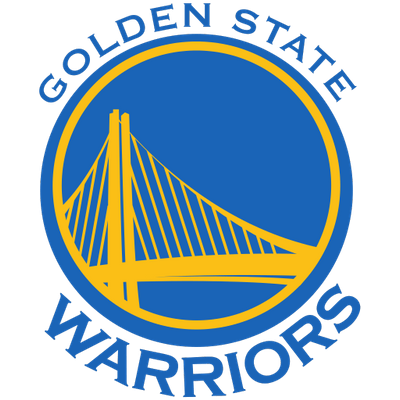
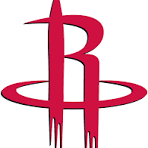
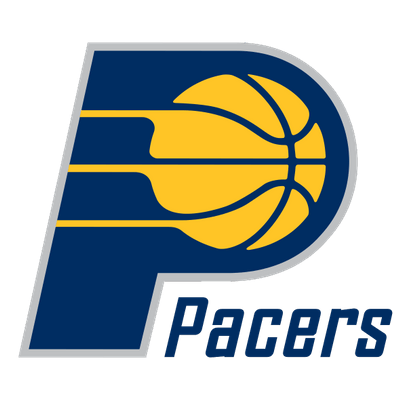
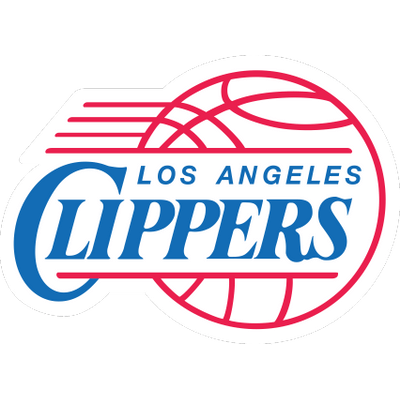
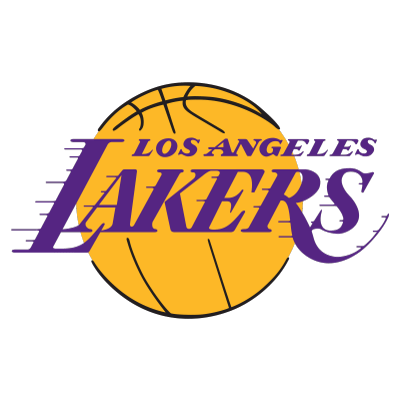
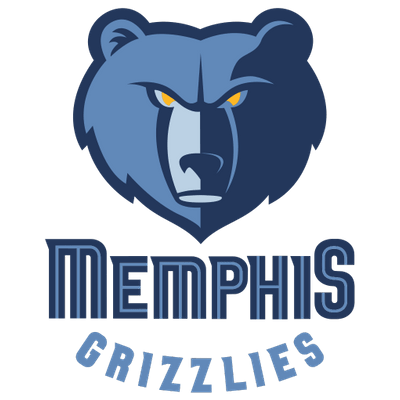
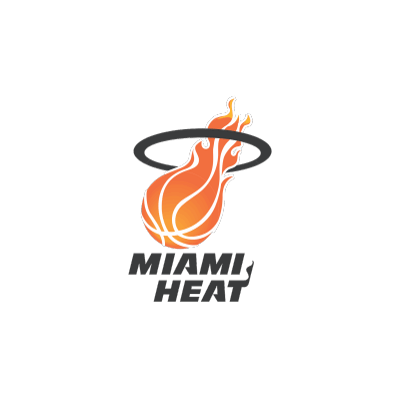
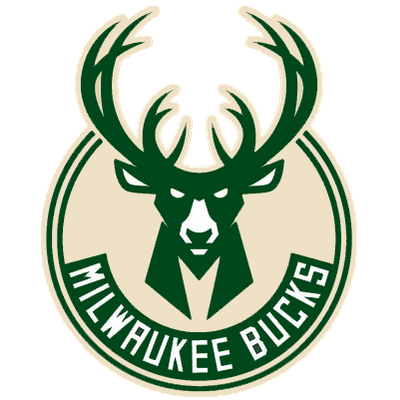
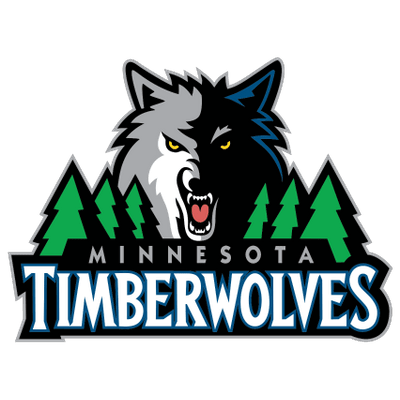
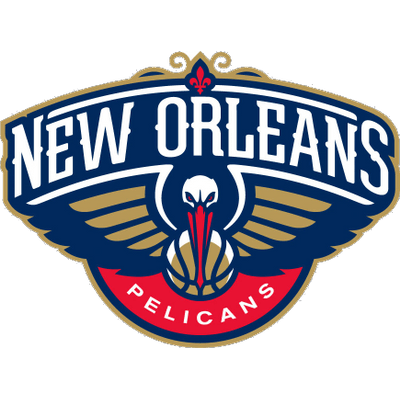
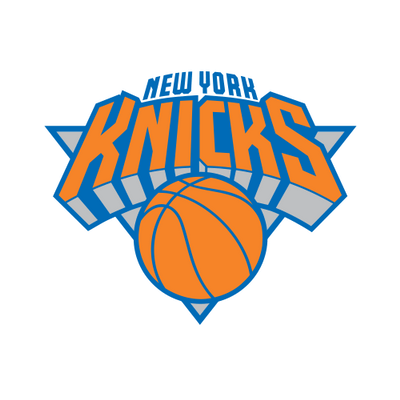
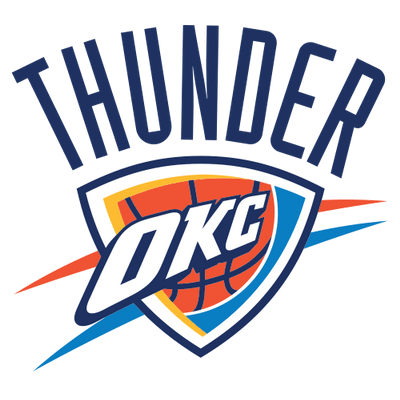
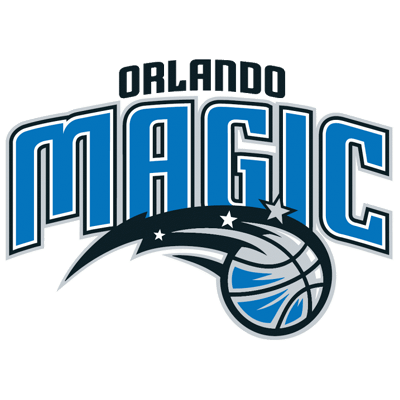
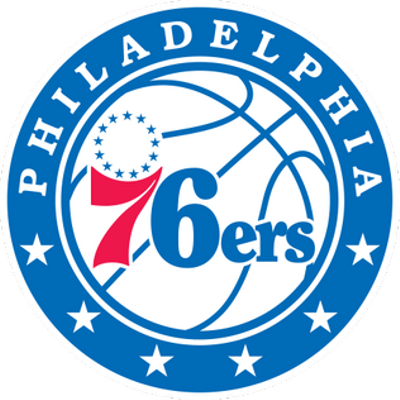
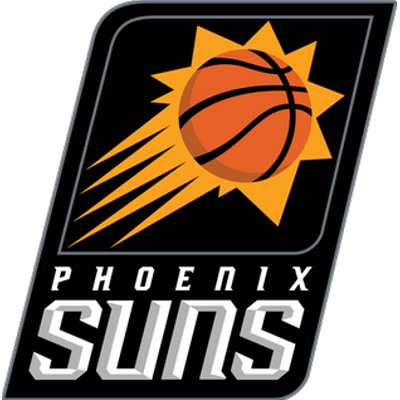
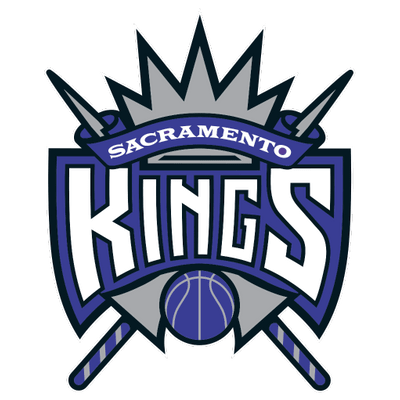
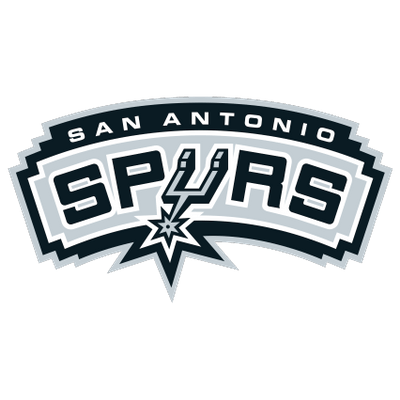
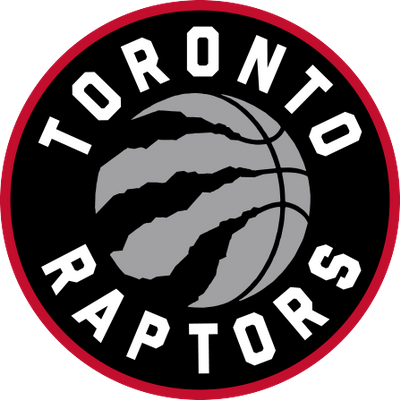
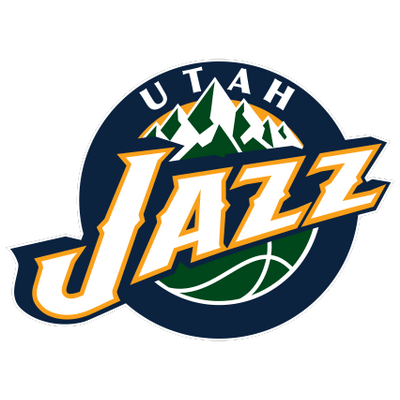
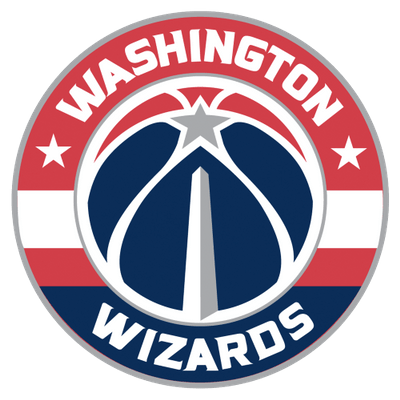

In [ ]:
import folium
from folium.features import CustomIcon
import os

LOGO_DIR = "NBA_logos"  # folder with your .png logos

# Base map centered on USA
m = folium.Map(location=[39.8, -98.6], zoom_start=4, tiles="OpenStreetMap")

for _, row in map_df.iterrows():
    team = row["Opp"]
    logo_path = os.path.join(LOGO_DIR, f"{team}.png")

    if not os.path.exists(logo_path):
        print(f"[WARNING] Missing logo for {team}: {logo_path}")
        continue

    icon = CustomIcon(
        logo_path,
        icon_size=(45, 45),
        icon_anchor=(22, 22)
    )

    popup_html = (
        f"<b>{team}</b><br>"
        f"Avg Minutes: {row['AvgMin']}<br>"
        f"Avg PTS: {row['AvgPTS']}<br>"
        f"Avg TRB: {row['AvgTRB']}<br>"
        f"Avg AST: {row['AvgAST']}"
    )

    folium.Marker(
        location=[row["Lat"], row["Lon"]],
        tooltip=team,    # shows on hover
        popup=popup_html,
        icon=icon
    ).add_to(m)

m
